## Ordinary Least Squares, Least Squares Estimation

A core concern in machine learning is _inference_, being able to predict future data based on past data.  An obvious way is to base your predictions on the _mean_ of a statistical model.

Have a look at the below code:

In [1]:
import pandas as pd

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df = df[["TV", "Sales"]]
df.head()

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


We have simplified the dataset to one parameter, the expenditure on advertisement on TV (which says something about how old this data is) and the corresponding amount of sales. In exercise 2 we investigated the _trend_ of TV against Sales. Now we will perform a _regression_ on the mean of the response (Sales), in other words we will find a regression line that follows the distribution of Sales given the amounts spent on TV ads (this is precisely $\mu_{Y|X}$).

### Exercise 1

1) Create a _design matrix_ $\mathbf{A}$ that corresponds to the right-hand side of the equation $Y = \beta_0 + \beta_1X$. Remember that what we are looking for are not the solutions to the system of equations or the values of x (which are given), but the values of the coefficients! How should $\beta_0$, the _bias_ or _intercept_, ie the displacement from 0 where the line crosses the $x$ axis, be handled? 

2) Perform a _least squares approximation_ to find the values of the coefficients. The equation is:
\begin{equation*}
\mathbf{b} = (A^TA)^{-1}A^TY
\end{equation*}

3) Plot the original data and your regression line in the same plot, that is the line $y = b_0 + b_1x$.

4) Find the variability of X, $S_{xx}$.
\begin{equation*}
S_{xx} = \sum_{i=1}^n(x_i - \bar{x})^2
\end{equation*}
5) Find the Sum of Square Errors about the regression line.
\begin{equation*}
\mathrm{SSE} = \sum_{i=0}^n(y_i - b_0 - b_1x_i)^2
\end{equation*}

6) Estimate the variance about the _true_ regression line.
\begin{equation*}
\mathrm{S}^2 = SSE / (n-2)
\end{equation*}

b0 (intercept) = 7.032593549127702
b1 (slope)     = 0.04753664043301965
S_xx = 1466819.02875
SSE = 2102.5305831313512
S^2 = 10.618841328946218


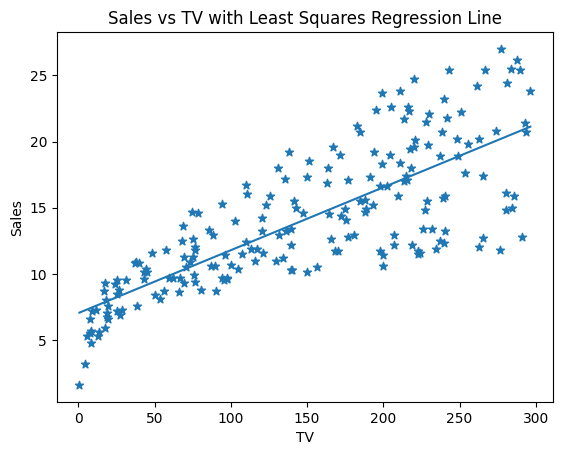

In [4]:
# 1) 
import numpy as np
import matplotlib.pyplot as plt

# X and Y as numpy arrays
x = df["TV"].to_numpy()
y = df["Sales"].to_numpy()
n = len(x)

# 1) Design matrix A for Y = b0 + b1 X
# b0 (intercept) is handled by adding a column of ones
A = np.column_stack([np.ones(n), x])   # shape (n, 2)

# 2) Least squares approximation: b = (A^T A)^(-1) A^T Y
b = np.linalg.inv(A.T @ A) @ (A.T @ y)
b0, b1 = b[0], b[1]

print("b0 (intercept) =", b0)
print("b1 (slope)     =", b1)

# 3) Plot data + regression line
x_line = np.linspace(x.min(), x.max(), 200)
y_line = b0 + b1 * x_line

plt.figure()
plt.scatter(x, y, label="Data" , marker='*')
plt.plot(x_line, y_line, label="Regression line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV with Least Squares Regression Line")

# 4) Variability of X: S_xx = sum (x_i - x_bar)^2
x_bar = x.mean()
S_xx = np.sum((x - x_bar) ** 2)
print("S_xx =", S_xx)

# 5) Sum of Squared Errors: SSE = sum (y_i - (b0 + b1 x_i))^2
y_hat = b0 + b1 * x
SSE = np.sum((y - y_hat) ** 2)
print("SSE =", SSE)

# 6) Estimate variance about the true regression line: S^2 = SSE / (n - 2)
S2 = SSE / (n - 2)
print("S^2 =", S2)
S = np.sqrt(S2)


### Exercise 2

Inferences on the slope of the line ($b_1$) can provide statistical evidence to conclude that the slope of the true regression line is not zero, in other words that a line really does capture some part of the behaviour of Y. 

1) Test the following hypothesis:
\begin{align*}
&H_0: \beta_1 = 0 \\
&H_1: \beta_1 \neq 0 \\
&T_{n-2} = \frac{B_1}{S/\sqrt{S_{xx}}}
\end{align*}
where the test rejects for large values in either positive or negative directions (ie a two-tailed test). What does it mean if this test accepts the null hypothesis?

2) Find a 95\% confidence interval on the slope of the regression line:
\begin{equation*}
B_1 \pm t_{\alpha/2}S/\sqrt{S_{xx}}
\end{equation*}



In [5]:
from scipy.stats import t
import numpy as np

alpha = 0.05
dfree = n - 2

# 1) Teststatistika för H0: beta1 = 0
SE_b1 = S / np.sqrt(S_xx)          # standardfel för b1
T_stat = b1 / SE_b1               # t-teststatistika
p_value = 2 * (1 - t.cdf(abs(T_stat), df=dfree))  # tvåsidigt p-värde

print("=== Hypotesprövning för lutningen ===")
print("H0: beta1 = 0, H1: beta1 != 0")
print(f"T = {T_stat:.3f}, df = {dfree}, p = {p_value:.6g}")

if p_value < alpha:
    print("Beslut: Förkasta H0 (lutningen skiljer sig signifikant från 0).")
else:
    print("Beslut: Förkasta inte H0 (inte tillräckligt med evidens att lutningen != 0).")
    print("Tolkning: X är då inte en statistiskt signifikant linjär förklaringsvariabel på nivån 5%.")

# 2) 95% konfidensintervall för beta1
tcrit = t.ppf(1 - alpha/2, df=dfree)
ci_low = b1 - tcrit * SE_b1
ci_high = b1 + tcrit * SE_b1

print("\n=== 95% Konfidensintervall för beta1 ===")
print(f"alpha = {alpha}, alpha/2 = {alpha/2}")
print(f"KI = ({ci_low:.5f}, {ci_high:.5f})")

# Extra kontroll (koppling test <-> KI)
print("\n0 ligger i KI?" , (ci_low <= 0 <= ci_high))


=== Hypotesprövning för lutningen ===
H0: beta1 = 0, H1: beta1 != 0
T = 17.668, df = 198, p = 0
Beslut: Förkasta H0 (lutningen skiljer sig signifikant från 0).

=== 95% Konfidensintervall för beta1 ===
alpha = 0.05, alpha/2 = 0.025
KI = (0.04223, 0.05284)

0 ligger i KI? False


### Exercise 3

The intercept is simply $b_0$. For many problems this is a kind of 'background' level in the data, for the advertisement problem it's the amount of sales that happen without any ads.

1) Test the following hypotheses:

\begin{align*}
&H_0: \beta_0 = 0 \\
&H_1: \beta_0 > 0 \\
&H_2: \beta_0 < 0 \\
&T_{n-2} = \frac{B_0}{(\frac{S\sqrt{\sum x^2}}{\sqrt{nS_{xx}}})}
\end{align*}
These are single-tailed tests.

2) Find a 95% confidence interval on the intercept.
\begin{equation*}
B_0 \pm t_{\alpha/2}\frac{S\sqrt{\sum x^2}}{\sqrt{nS_{xx}}}
\end{equation*}

3) Find a confidence interval for the mean for each row in the data:
\begin{equation*}
\hat{\mu}_{Y|x} \pm t_{\alpha/2}S\sqrt{\frac{1}{n} + \frac{(x-\bar{x})^2}{S_{xx}}}
\end{equation*}

4) Plot a _confidence band_ for your regression line.

b0 = 7.0325935491276965
SE(b0) = 0.45784294027347855
t = 15.36027517411755
p-value (H1: beta0>0) = 0.0
p-value (H2: beta0<0) = 1.0
95% CI for beta0: (np.float64(6.129719268804429), np.float64(7.935467829450964))


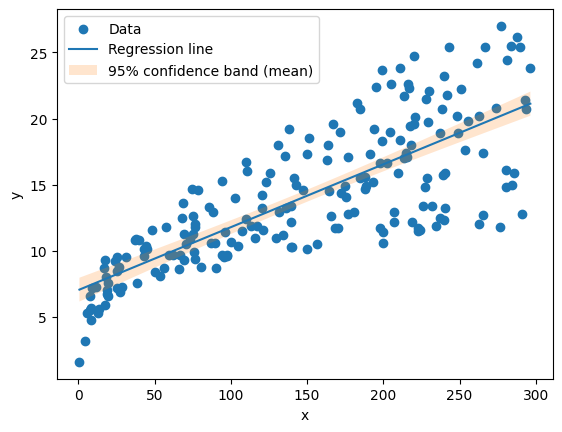

In [ ]:
from scipy import stats

# --- Replace these with your data ---
xbar = x.mean()
ybar = y.mean()

Sxx = np.sum((x - xbar)**2)
Sxy = np.sum((x - xbar)*(y - ybar))

b1 = Sxy / Sxx
b0 = ybar - b1*xbar

yhat = b0 + b1*x
resid = y - yhat
SSE = np.sum(resid**2)
S = np.sqrt(SSE / (n - 2))
df = n - 2

# --- Part 1: t-tests for intercept ---
SE_b0 = S * np.sqrt(1/n + (xbar**2)/Sxx)
t_stat = b0 / SE_b0

alpha = 0.05
tcrit_one = stats.t.ppf(1 - alpha, df)

p_right = 1 - stats.t.cdf(t_stat, df)   # H1: beta0 > 0
p_left  = stats.t.cdf(t_stat, df)       # H2: beta0 < 0

print("b0 =", b0)
print("SE(b0) =", SE_b0)
print("t =", t_stat)
print("p-value (H1: beta0>0) =", p_right)
print("p-value (H2: beta0<0) =", p_left)

# --- Part 2: 95% CI for intercept ---
tcrit_two = stats.t.ppf(1 - alpha/2, df)
CI_b0 = (b0 - tcrit_two*SE_b0, b0 + tcrit_two*SE_b0)
print("95% CI for beta0:", CI_b0)

# --- Part 3: mean-response CI for each row ---
SE_mean_each = S * np.sqrt(1/n + ((x - xbar)**2)/Sxx)
lower_each = yhat - tcrit_two*SE_mean_each
upper_each = yhat + tcrit_two*SE_mean_each

# --- Part 4: confidence band over a grid ---
xg = np.linspace(x.min(), x.max(), 200)
yg = b0 + b1*xg
SE_mean_g = S * np.sqrt(1/n + ((xg - xbar)**2)/Sxx)
lower_g = yg - tcrit_two*SE_mean_g
upper_g = yg + tcrit_two*SE_mean_g

# Plot
plt.scatter(x, y, label="Data")
plt.plot(xg, yg, label="Regression line")
plt.fill_between(xg, lower_g, upper_g, alpha=0.2, label="95% confidence band (mean)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
